In [8]:
! pip install cirq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.8/670.8 kB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 430.5/430.5 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 66.5 MB/s eta 0:00:00


In [9]:
import cirq

# 量子ビットを定義
q0 = cirq.GridQubit(0, 0)
q1 = cirq.GridQubit(0, 1)

# 回路を作成
circuit = cirq.Circuit(
    cirq.H(q0),  # アダマールゲート
    cirq.CNOT(q0, q1), # CNOTゲート
    cirq.measure(q0, key='q0'),
    cirq.measure(q1, key='q1')
)

print("回路:\n", circuit)

simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=1000)

print("\n測定結果:\n", result.histogram(key='q0'))
print(result.histogram(key='q1'))

回路:
 (0, 0): ───H───@───M('q0')───
               │
(0, 1): ───────X───M('q1')───

測定結果:
 Counter({0: 502, 1: 498})
Counter({0: 502, 1: 498})


## Pauli-Xゲート（NOTゲート）

In [10]:
import cirq

# 量子ビットを定義
qubit = cirq.GridQubit(0, 0)

# 回路を作成
circuit = cirq.Circuit(
    cirq.X(qubit), # Pauli-Xゲートを適用
    cirq.measure(qubit, key='m')
)

print("回路:\n", circuit)

# シミュレータで実行（1000回）
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=1000)

print("\n測定結果:\n", result.histogram(key='m'))

回路:
 (0, 0): ───X───M('m')───

測定結果:
 Counter({1: 1000})


In [11]:
!pip install cirq-google
!pip install --upgrade cirq

## 量子テレポーテーション回路の実装と描画

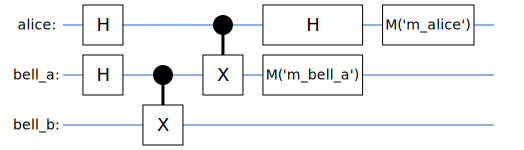

In [12]:
import cirq
from cirq.contrib.svg import SVGCircuit
from IPython.display import display

# 量子ビットを定義:
# - alice_qubit: 転送したい状態を持つ量子ビット
# - bell_qubit_a: アリスが持つもつれた量子ビット
# - bell_qubit_b: ボブが持つもつれた量子ビット
alice_qubit = cirq.NamedQubit('alice')
bell_qubit_a = cirq.NamedQubit('bell_a')
bell_qubit_b = cirq.NamedQubit('bell_b')

# 回路を構築
teleportation_circuit = cirq.Circuit(
    # Ste1: 転送したい量子ビットの初期状態を設定
    # ここでは例として、量子ビットを重ね合わせ状態に
    cirq.H(alice_qubit),

    # Step2: アリスとボブの間にエンタングルメント状態を作成
    cirq.H(bell_qubit_a),
    cirq.CNOT(bell_qubit_a, bell_qubit_b),

    # Step3: アリスの操作
    cirq.CNOT(alice_qubit, bell_qubit_a),
    cirq.H(alice_qubit),

    # Step4: アリスの測定と古典ビットへの保存
    cirq.measure(alice_qubit, key='m_alice'),
    cirq.measure(bell_qubit_a, key='m_bell_a')
)

svg_circuit = SVGCircuit(teleportation_circuit)

display(svg_circuit)